# Introduction

The goal of this project is to analyze Women's National Basketball Association (WNBA) data, specifically for the New York Liberty.

Here are a few questions that this project has sought to answer:
- How have the Liberty performed historically?
- Does assisting field goals have a significant effect on team performance?
- Does scoring points off of turnovers have a significant effect on team performance?

**Data Sources**
The datasets 'AST_MASTER.csv' was provided by [Kaggle.com] (https://www.kaggle.com/)

## Import Python Modules
Here we import the primary modules we will use in this project.

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the Data
Here we load the datasets into dataframes to easier analyze and visualize with Python.

# scoring
The `AST_MASTER.csv` contains scoring statistics for each team in the WNBA from the 1997 season through the 2023 season.

In [3]:
scoring = pd.read_csv('AST_MASTER.csv',encoding='utf-8')
scoring.columns = [c.replace(' ','_') for c in scoring.columns]
scoring.columns = [c.lower() for c in scoring.columns]
scoring.columns = [c.replace('%','') for c in scoring.columns]
scoring['win_pct'] = ((scoring.w / scoring.gp) * 100).round(1)
scoring.head()

,team,gp,w,l,min,fga_2pt,fga_3pt,pts_2pt,pts_2pt_-_mr,pts_3pt,...,pts_pitp,2fgm_ast,2fgm_uast,3fgm_ast,3fgm_uast,fgm_ast,fgm_uast,season_type,season,win_pct
0,NEW YORK LIBERTY,28,17,11,40.5,80.3,19.7,64.4,13.6,14.6,...,50.8,64.8,35.2,92.5,7.5,68.4,31.6,Regular,1997,60.7
1,CHARLOTTE STING,28,15,13,40.0,80.6,19.4,64.6,14.5,17.5,...,50.1,64.0,36.0,86.4,13.6,67.5,32.5,Regular,1997,53.6
2,PHOENIX MERCURY,28,16,12,40.1,75.6,24.4,54.3,11.9,20.6,...,42.3,61.2,38.8,87.0,13.0,66.4,33.6,Regular,1997,57.1
3,UTAH STARZZ,28,7,21,40.4,80.4,19.6,62.0,13.8,17.6,...,48.2,59.9,40.1,84.0,16.0,63.7,36.3,Regular,1997,25.0
4,CLEVELAND ROCKERS,28,15,13,40.5,89.2,10.8,67.2,17.0,9.9,...,50.2,60.5,39.5,87.7,12.3,62.9,37.1,Regular,1997,53.6


## Explore the Data
Now we will dig further into the data. We see that there are 24 unique teams in the dataset, but the current state of the WNBA only has 12 Teams.  We will later filter out defunct franchises.

In [5]:
print(f"Number of teams: {scoring.team.nunique()}")
print(f"Teams: {scoring.team.unique()}")

Number of teams: 24
Teams: ['NEW YORK LIBERTY' 'CHARLOTTE STING' 'PHOENIX MERCURY' 'UTAH STARZZ'
 'CLEVELAND ROCKERS' 'LOS ANGELES SPARKS' 'SACRAMENTO MONARCHS'
 'HOUSTON COMETS' 'DETROIT SHOCK' 'WASHINGTON MYSTICS' 'MINNESOTA LYNX'
 'ORLANDO MIRACLE' 'MIAMI SOL' 'PORTLAND FIRE' 'INDIANA FEVER'
 'SEATTLE STORM' 'CONNECTICUT SUN' 'SAN ANTONIO SILVER STARS'
 'CHICAGO SKY' 'ATLANTA DREAM' 'TULSA SHOCK' 'SAN ANTONIO STARS'
 'DALLAS WINGS' 'LAS VEGAS ACES']


Below we can see that the `scoring` dataset contains information for both regular season and playoffs, resulting in a different overall sample size for teams that did and did not qualify for the postseason.

In [6]:
print(f"Number of Season Types: {scoring.season_type.nunique()}")
print(f"Teams: {scoring.season_type.unique()}")

Number of Season Types: 2
Teams: ['Regular' 'Playoffs']


We will be focusing primarily on the New York Liberty for this project, so we will now create a separate dataframe with just data of the Liberty.

In [7]:
liberty = scoring[scoring.team == "NEW YORK LIBERTY"]
liberty.head()

,team,gp,w,l,min,fga_2pt,fga_3pt,pts_2pt,pts_2pt_-_mr,pts_3pt,...,pts_pitp,2fgm_ast,2fgm_uast,3fgm_ast,3fgm_uast,fgm_ast,fgm_uast,season_type,season,win_pct
0,NEW YORK LIBERTY,28,17,11,40.5,80.3,19.7,64.4,13.6,14.6,...,50.8,64.8,35.2,92.5,7.5,68.4,31.6,Regular,1997,60.7
10,NEW YORK LIBERTY,30,18,12,40.3,84.2,15.8,64.7,14.8,13.4,...,50.0,65.0,35.0,87.0,13.0,67.7,32.3,Regular,1998,60.0
23,NEW YORK LIBERTY,32,18,14,39.7,75.6,24.4,57.7,16.6,24.1,...,41.1,58.4,41.6,87.7,12.3,64.8,35.2,Regular,1999,56.2
40,NEW YORK LIBERTY,32,20,12,40.2,78.2,21.8,61.2,18.3,18.9,...,42.8,55.7,44.3,82.2,17.8,60.2,39.8,Regular,2000,62.5
48,NEW YORK LIBERTY,32,21,11,40.0,77.0,23.0,62.3,17.6,22.2,...,44.7,61.2,38.8,88.1,11.9,66.4,33.6,Regular,2001,65.6


The Liberty have been in the WNBA for 27 seasons. They have won just under half of their total games played. 

In [8]:
total_gp = liberty.gp.sum()
total_w = liberty.w.sum()
total_l = liberty.l.sum()
win_pct = ((total_w / total_gp) * 100).round(2)
print(f"Total Games Played (including Playoffs): {total_gp}")
print(f"Total Wins (including Playoffs): {total_w}")
print(f"Total Losses (including Playoffs): {total_l}")
print(f"Win Percentage (including Playoffs): {win_pct}%")

Total Games Played (including Playoffs): 955
Total Wins (including Playoffs): 476
Total Losses (including Playoffs): 479
Win Percentage (including Playoffs): 49.84%


We will now sort our data for the Liberty into two datasets to be able to analyze just the Playoffs and just the Regular Season independently.

In [9]:
print(liberty.groupby("season_type").size())
liberty_reg = liberty[liberty.season_type == "Regular"]
liberty_playoffs = liberty[liberty.season_type == "Playoffs"]

season_type
Playoffs    15
Regular     27
dtype: int64


Below we see a plot comparing Win Percentage (%) by Year.  We can see that the Liberty have not been able to string together much success.  In the early 2000s every year of improvement was followed by a decline the following year or two.

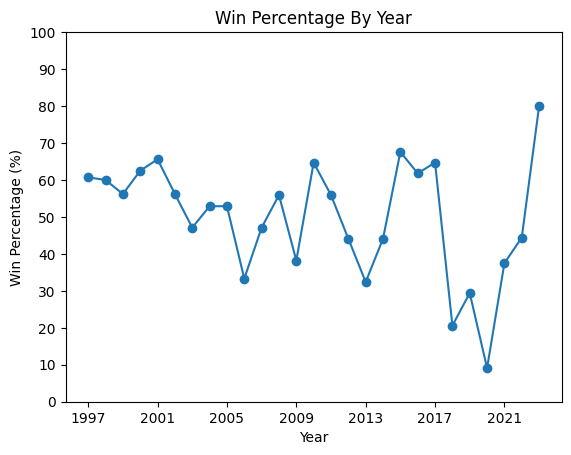

In [10]:
plt.plot(liberty_reg.season, liberty_reg.win_pct, marker='o')
plt.title("Win Percentage By Year")
plt.xlabel("Year")
plt.xticks(np.arange(1997, 2024, 4))
plt.yticks(np.arange(0, 110, 10))
plt.ylabel("Win Percentage (%)")
plt.show()

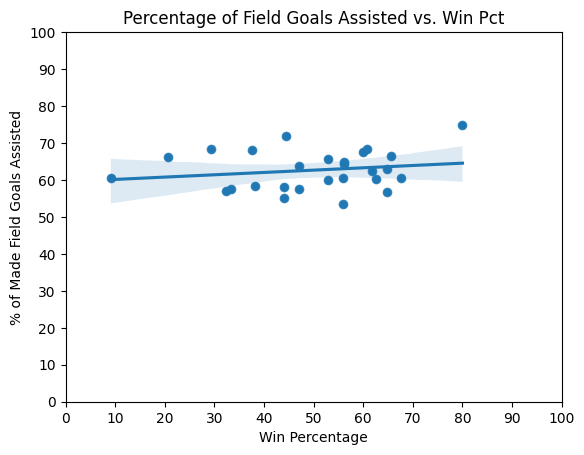

In [11]:
sns.scatterplot(data=liberty_reg, x='win_pct', y='fgm_ast')
sns.regplot(data=liberty_reg, x='win_pct', y='fgm_ast')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 110, 10))
plt.title("Percentage of Field Goals Assisted vs. Win Pct")
plt.xlabel("Win Percentage")
plt.ylabel("% of Made Field Goals Assisted")
plt.show()

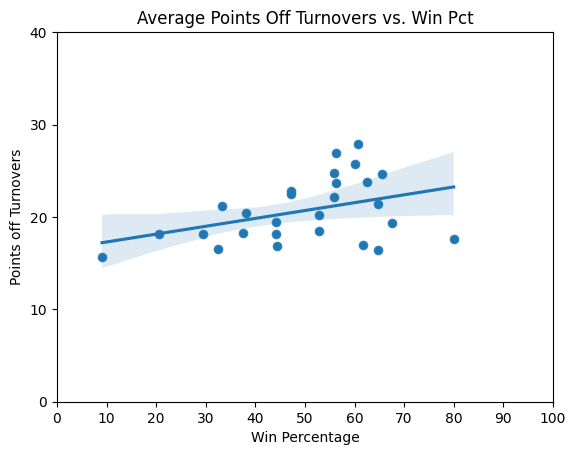

In [12]:
sns.scatterplot(data=liberty_reg, x='win_pct', y='pts_offto')
sns.regplot(data=liberty_reg, x='win_pct', y='pts_offto')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 50, 10))
plt.title("Average Points Off Turnovers vs. Win Pct")
plt.ylabel("Points off Turnovers")
plt.xlabel("Win Percentage")
plt.show()

## Analysis
We will now assess the statistical significance of the above two relationships.  We will do so by calculating correlation coefficients and p-values.

# Assisted Field Goals Made vs. Win Percentage
As the p-value of the relationship is greater than 0.05, we can conclude that the correlation between the variables is not statistically significant.

# Points of Turnovers vs. Win Percentage
The p-value of this relationship is less than 0.05, so we can conclude that the correlation between these two variables is statistically significant.

In [13]:
correlation_coefficient, p_value = pearsonr(liberty_reg['win_pct'], liberty_reg['fgm_ast'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

Correlation Coefficient: 0.18803531817071636
p-value: 0.34760642872865605


In [14]:
correlation_coefficient, p_value = pearsonr(liberty_reg['win_pct'], liberty_reg['pts_offto'])
print(f"Correlation Coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

Correlation Coefficient: 0.39161230708699624
p-value: 0.043374136219972166


# Conclusion
Although often a conversation point, based off of our statistical analysis there is not a statistically significant correlation between team wins and scoring points off of assists.

We did find a statistical significance between points scored off of turnvovers and team wins. This sides along with expectations of the importance of defense in the modern game of basketball.

This data analysis is by nature limited as the only data I had at hand was scoring related.  Therefore points scored off of turnovers served almost as a proxy for defensive performance.